## Pair Programming Visualización

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos. A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

In [116]:
!pip install matplotlib
!pip install seaborn

In [117]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("world-data-2023-leccion06.csv", index_col=0) 

In [118]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.000000,32.49,93.0,Kabul,8.67,149.9000,2.300000,AFN,4.47,2.1,0.70,104.0,9.700000,47.9,Kabul,64.500000,638.000000,0.43,Pashto,78.4,0.28,38041754.00,48.90,9.300000,71.400000,11.120000,9797273.00,Asia
1,Albania,105.0,AL,43.1,28.75,9.000000,11.78,355.0,Tirana,4.54,119.0500,1.400000,ALL,1.62,28.1,1.36,107.0,55.000000,7.8,Tirana,78.500000,15.000000,1.12,Albanian,56.9,1.20,2854191.00,55.70,18.600000,36.600000,12.330000,1747593.00,Europe
2,Algeria,18.0,DZ,17.4,2381741.00,317.000000,24.28,213.0,Algiers,150.01,151.3600,2.000000,DZD,3.02,0.8,0.28,109.9,51.400000,20.1,Algiers,76.700000,112.000000,0.95,Arabic,28.1,1.72,43053054.00,41.20,37.200000,66.100000,11.700000,31510100.00,Africa
3,Andorra,164.0,AD,40.0,468.00,58627.064327,7.20,376.0,Andorra la Vella,469.00,144.1936,6.722346,EUR,1.27,34.0,1.51,106.4,37.963388,2.7,Andorra la Vella,72.279679,160.392265,6.63,Catalan,36.4,3.33,77.14,62.45,16.573964,40.822404,6.886364,67.87,Europe
4,Angola,26.0,AO,47.5,1246700.00,117.000000,40.73,244.0,Luanda,34.69,261.7300,17.100000,AOA,5.52,46.3,0.97,113.5,9.300000,51.6,Luanda,60.800000,241.000000,0.71,Portuguese,33.4,0.21,31825295.00,77.50,9.200000,49.100000,6.890000,21061025.00,Africa


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

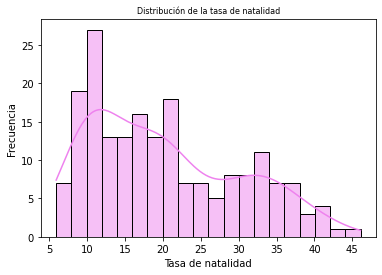

In [119]:
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );

plt.xlabel("Tasa de natalidad")
plt.ylabel("Frecuencia")

plt.title("Distribución de la tasa de natalidad", fontsize = 8);

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

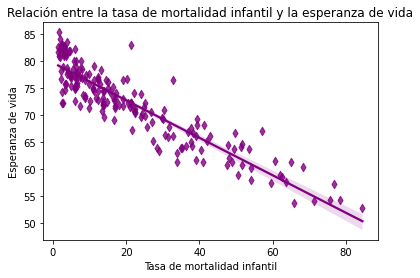

In [120]:
sns.regplot(x = "infant_mortality", 
            y = "life_expectancy", 
            data = df, 
            marker = "d",
            color = "purple")

plt.xlabel("Tasa de mortalidad infantil")
plt.ylabel("Esperanza de vida")

plt.title("Relación entre la tasa de mortalidad infantil y la esperanza de vida");

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [121]:
pais_por_continente = df.groupby("continent")["country"].count().reset_index()
pais_por_continente

,continent,country
0,Africa,54
1,Asia,48
2,Europe,44
3,North America,23
4,Oceania,14
5,South America,12


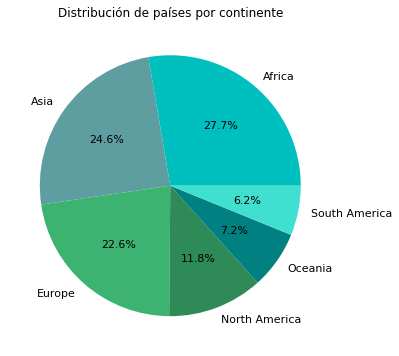

In [122]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.figure(figsize = (6, 6), facecolor = "white")

plt.pie("country", labels= "continent",
        data = pais_por_continente, 
        autopct = "%1.1f%%",
        colors = colores, 
        textprops={"fontsize": 11})

plt.xticks(rotation = 90);

plt.title("Distribución de países por continente");

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

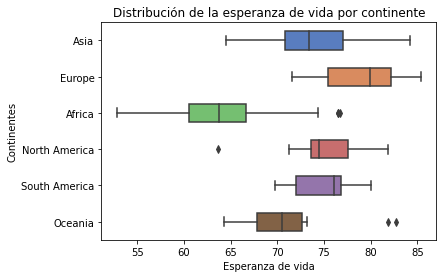

In [123]:
sns.boxplot(x= "life_expectancy", 
            y = "continent",
            data = df, 
            width = 0.5, 
            palette = "muted");

plt.xlabel("Esperanza de vida")
plt.ylabel("Continentes")

plt.title("Distribución de la esperanza de vida por continente");

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

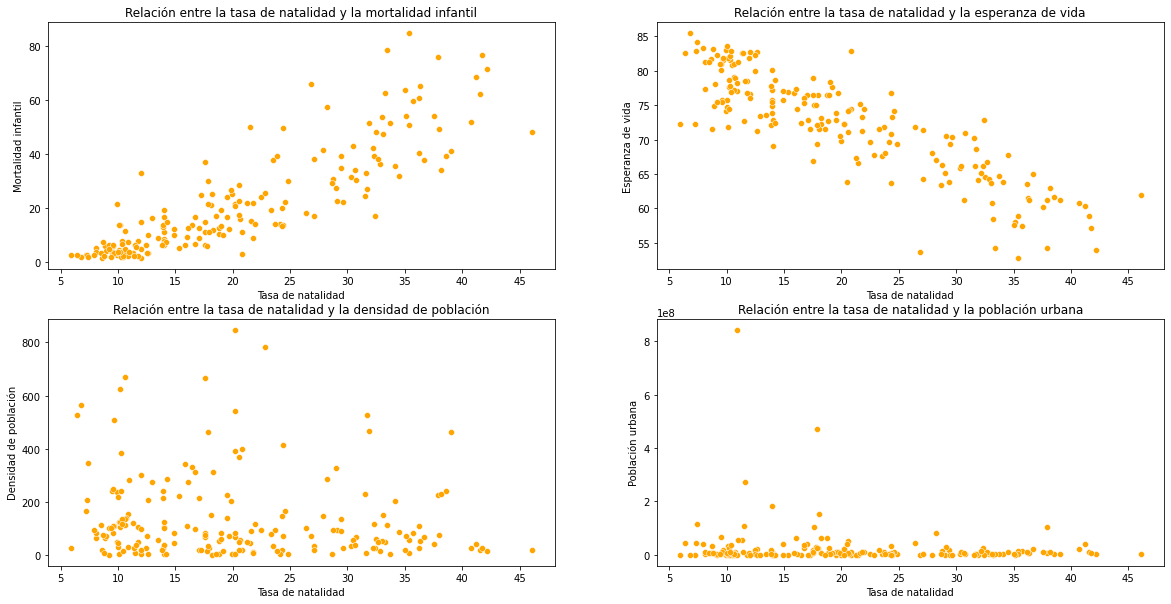

In [124]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

sns.scatterplot(x = "birth_rate", 
                y = "infant_mortality", 
                data = df,
                ax = axes[0][0],
                color = "orange");

sns.scatterplot(x = "birth_rate", 
                y = "life_expectancy", 
                data = df,
                ax = axes[0][1],
                color = "orange");

sns.scatterplot(x = "birth_rate", 
                y = "density", 
                data = df,
                ax = axes[1][0],
                color = "orange");

sns.scatterplot(x = "birth_rate", 
                y = "urban_population", 
                data = df,
                ax = axes[1][1],
                color = "orange");

axes[0][0].set_xlabel("Tasa de natalidad")
axes[0][1].set_xlabel("Tasa de natalidad")
axes[1][0].set_xlabel("Tasa de natalidad")
axes[1][1].set_xlabel("Tasa de natalidad")

axes[0][0].set_ylabel("Mortalidad infantil")
axes[0][1].set_ylabel("Esperanza de vida")
axes[1][0].set_ylabel("Densidad de población")
axes[1][1].set_ylabel("Población urbana")

axes[0][0].set_title("Relación entre la tasa de natalidad y la mortalidad infantil")
axes[0][1].set_title("Relación entre la tasa de natalidad y la esperanza de vida")
axes[1][0].set_title("Relación entre la tasa de natalidad y la densidad de población")
axes[1][1].set_title("Relación entre la tasa de natalidad y la población urbana");

6. ¿Cuáles son los 10 países con la mayor área forestal?

In [125]:
paises_forestales = df.sort_values(by = "forested_area", ascending = False).head(10)

paises_forestales[["country", "forested_area"]]

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


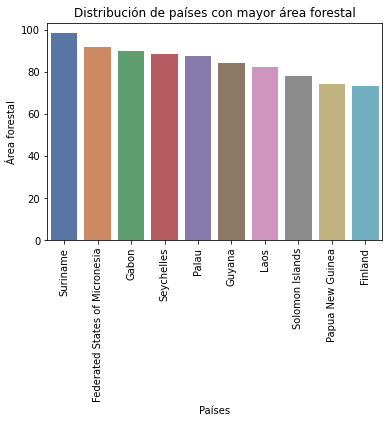

In [126]:
sns.barplot(x = "country", 
            y = "forested_area", 
            data = paises_forestales,
            palette = "deep")

plt.xticks(rotation = 90)

plt.xlabel("Países")
plt.ylabel("Área forestal")

plt.title("Distribución de países con mayor área forestal");

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

- Todas deben llevar título.

- Los nombres de los ejes deben estar en castellano.

- En los scatterplot los puntos deben tener un tamaño de 2.

- En los scatterplot los puntos deben tener un color diferente al azul.

- En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

- En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

- En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.